<a href="https://colab.research.google.com/github/Obreintelly/EDA/blob/main/Week_2_IP_Exploratory_Data_Analysis_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis: Financial Inclusion in East Africa**

# **1.0 Defining the Question**

---



a) Specifying the Data Analytics Question

Does age, gender and location influence the opening of a bank account in Kenya, Tanzania, Uganda and Rwanda?

b) Defining the metric for success

How accurate gender, age, location among others determine whether one has a bank account or not

c) Understanding the context

Across East Africa (Kenya, Uganda, Tanzania and Rwanda) financial inclusion has gained great focus because it is one of the ways in which people directly participate in the economy. Sending and receiving money for saving purposed or processing payments are facilitated by banks or mobile solutions. Banks invest a lot of money in adverts to get more people engaged. More people participating influences government's regulatory policy to protect unsophisticated citizens.

d) Experiment Design

1. Dataset acquisition
2. Cleaning and tidying up dataset
3. Carrying out univariate, bivariate and multivavriate analysis
4. Challenging the solutions

# Importing Python Libraries

In [154]:
#importing Pandas libraries
import pandas as pd
#importing numpy libraries
import numpy as np
#Importing Seaborn Library
import seaborn as sns
#Importing Matplotlib Library
import matplotlib.pyplot as plt
% matplotlib inline 


In [155]:
#Dataset url = http://bit.ly/FinancialDataset

# Loading and Previewing Our Dataset

In [156]:
finance= pd.read_csv('http://bit.ly/FinancialDataset')

#Previewing the top of our dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [157]:
#Preview the bottom of our dataset

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [158]:
#Size of the dataset. Number of records in our dataset
finance.shape

(23524, 13)

In [159]:
#Checking our columns have the correct data types
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# **1.1 External Dataset Validation**

#Our data is credible and can be verfied by the following authoritative sources:
#https://fsdkenya.org/publication/finaccess2019/ 
In Rwanda, for instance the data we have shows a high number of people with bank accounts which is consistent woth external data showing more than 1.4 million people have at least 1 bank product. 
#http://www.statistics.gov.rw/publication/finscope-rwanda-2016
In Tanzania, 16.7% of people had bank accounts as of 2017 which is not far from what we have in our dataset(around 18%).
# https://www.fsdt.or.tz/wp-content/uploads/2017/09/Finscope.pdf
#http://www.fsdt.or.tz/finscope/
#http://fsduganda.or.ug/finscope-2018-survey-report/

# Tidying Up the Dataset

In [160]:
finance.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [161]:
#Checking for missing values
finance.isna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


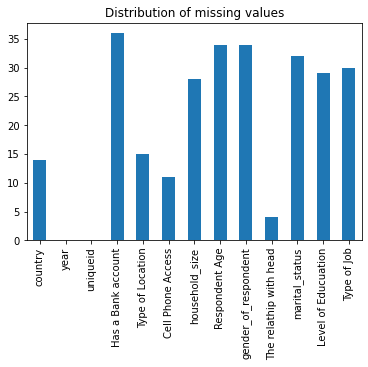

In [162]:
#Plotting missing values to visualize their distribution 
#
finance.isna().sum().plot(kind='bar')
plt.title('Distribution of missing values')
plt.show()

In [163]:
#Dropping all the missing values since we have a big data sample size. 
#The effect on our findings will be miniscule. 
finance.dropna(inplace=True)

In [164]:
finance.isna().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [165]:
#Checking for duplicates
finance.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23343, dtype: bool

In [166]:
#Doesn't seem like our data is duplicated. We proceed to drop any unseen duplicates.
finance.drop_duplicates()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Tidying Up Columns

In [167]:
#Rename Columns
finance.rename(columns={'Level of Educuation':'Education_level','Type of Location':'Location','Respondent Age':'Age','gender_of_respondent':'Gender','Cell Phone Access':'Cellphone Access', 'The relathip with head':'relationship with head', 'Type of Job':'Job_type'}, inplace=True)

In [168]:
#Standardizing columns
finance.columns = finance.columns.str.strip().str.upper().str.replace(' ', '_')
finance.head(1)

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,RELATIONSHIP_WITH_HEAD,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


In [169]:
#Dropping columns we do not need to answer the question under investigations
finance['HOUSEHOLD_SIZE'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

In [170]:
#Investigating our columns further
finance['YEAR'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [171]:
#From the dataset description and external data, we know we do not have data beyond 2018
#However ourdataset has Years 2029, 2039 and 2056
#Let's check where and how many times they appear. 
finance[finance['YEAR']>2018]

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,RELATIONSHIP_WITH_HEAD,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [172]:
#Dropping years not in scope
finance = finance.drop(finance[finance['YEAR']>2018].index)

finance['YEAR'].unique()

array([2018, 2016, 2017])

In [173]:
#Investigating the Country column
finance['COUNTRY'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [174]:
#Investigating the Age Column 
finance['AGE'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [175]:
finance.drop(['UNIQUEID', 'MARITAL_STATUS','RELATIONSHIP_WITH_HEAD'], axis=1, inplace=True)

In [176]:
#Checking number of records in our dataset
finance.shape

(23340, 10)

In [177]:
#Display remaining columns
finance.head()

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


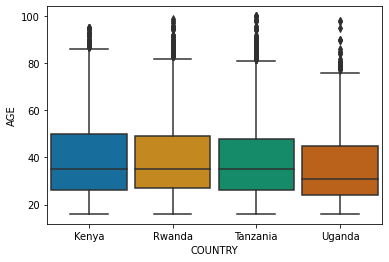

In [178]:
#Checking for Outliers in Our Dataset
bplot =sns.boxplot(y='AGE', x='COUNTRY', data= finance,  width=0.9, palette='colorblind')
#There are outliers in our data. Ages 90 to 100 standout


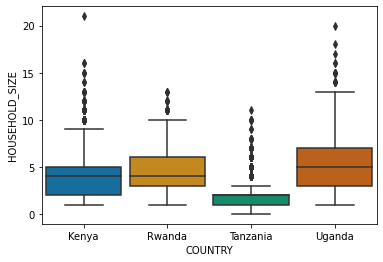

In [179]:
bplot =sns.boxplot(y='HOUSEHOLD_SIZE', x='COUNTRY', data= finance,  width=0.9, palette='colorblind')

In [180]:
#Checking for anomalies
#q1_age= finance['AGE'].quantile(.25)
#q3_age= finance['AGE'].quantile(.75)
#iqr_age = q3_age-q1_age

#q1_house=finance['HOUSEHOLD_SIZE'].quantile(.25)
#q3_house= finance['HOUSEHOLD_SIZE'].quantile(.75)
#iqr_house= q3_house-q1_house

#qi_age, q3_house=np.percentile(finance['AGE'],[25,75])
#iqr = q3_house-q1_age

#l_bound = q1_age - (1.5*iqr)
#u_bound = q3_house + (1.5 * iqr)
#print(iqr_age, iqr)

q1= finance.quantile(0.25)
q3= finance.quantile(0.75)
iqr= q3-q1
finance = finance[~((finance < (q1 - 1.5 * iqr)) | (finance > (q3 + 1.5 * iqr))).any(axis=1)]

# Save Tidied Up Version

In [181]:
finance.to_csv('finance_inclusion.csv', index=False)

In [182]:
#Load our new Dataset
finance_inclusion = pd.read_csv('/content/finance_inclusion.csv')
finance_inclusion.head()

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [183]:
finance_inclusion['EDUCATION_LEVEL'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

# **1. Univariate Analysis**

# Categorical Variables in Our Dataset

In [184]:
#Generating Frequency Tables for COUNTRY
finance_inclusion.COUNTRY.value_counts()

Rwanda      8512
Tanzania    6424
Kenya       5868
Uganda      1921
Name: COUNTRY, dtype: int64

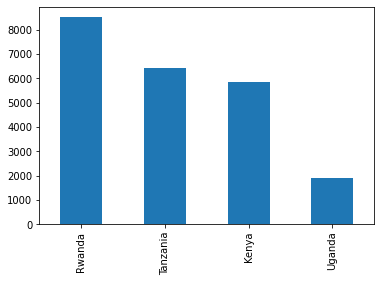

In [185]:
#Visual representation of frequency per country
finance_inclusion.COUNTRY.value_counts().plot.bar()

In [186]:
finance_inclusion.groupby('COUNTRY')['YEAR'].value_counts()

COUNTRY   YEAR
Kenya     2018    5868
Rwanda    2016    8512
Tanzania  2017    6424
Uganda    2018    1921
Name: YEAR, dtype: int64

(array([ 911., 1090., 1091.,  707.,  542.,  540.,  324.,  266.,  279.,
         118.]),
 array([16. , 22.7, 29.4, 36.1, 42.8, 49.5, 56.2, 62.9, 69.6, 76.3, 83. ]),
 <a list of 10 Patch objects>)

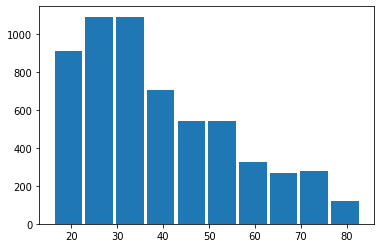

In [187]:
#Creating a histogram showing the age distribution in Kenya
kenya_only = finance_inclusion[finance_inclusion['COUNTRY']=='Kenya']
plt.hist(kenya_only['AGE'], bins=10, histtype='bar', rwidth=0.9)

(array([193., 679., 774., 512., 353., 300., 161., 120.,  95.,  48.]),
 array([16. , 22.7, 29.4, 36.1, 42.8, 49.5, 56.2, 62.9, 69.6, 76.3, 83. ]),
 <a list of 10 Patch objects>)

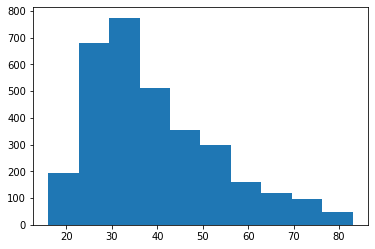

In [188]:
#Histogram of Kenyans with a bank acoount in Urban areas
kenya_with_account= finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='Yes']
plt.hist(kenya_with_account['AGE'], bins=10, histtype='bar')

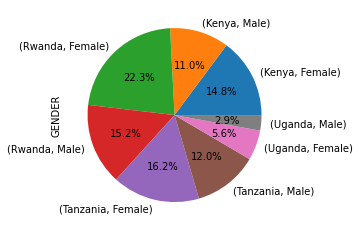

In [189]:
finance_inclusion.groupby('COUNTRY')['GENDER'].value_counts().plot(kind='pie', autopct= '%1.1f%%')

In [190]:
#Analysis for Kenya

Text(0.5, 1.0, 'Distribution of Bank Accounts by Gender in Kenya')

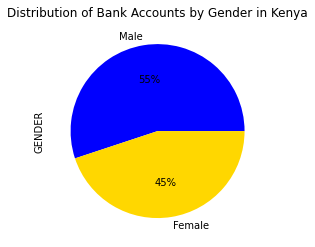

In [191]:
#Displaying Distribution of Bank Accounts by Gender in Kenya
colors=['blue', 'gold']
kenya_with_account['GENDER'].value_counts().plot(kind='pie', colors=colors, autopct='%1.0f%%')
plt.title('Distribution of Bank Accounts by Gender in Kenya')

In [192]:
#Displaying data filtered for Kenyans without bank accounts
kenya_no_account= finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='No']

Text(0.5, 1.0, 'Distributions of Kenyans without Bank Accounts by Gender')

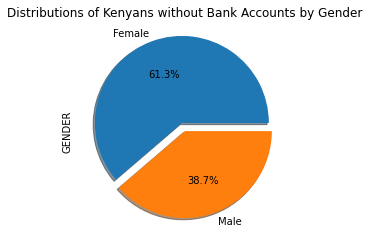

In [193]:
#Kenyans without accounts by Gender
explode =(0.1,0)
kenya_no_account['GENDER'].value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distributions of Kenyans without Bank Accounts by Gender')

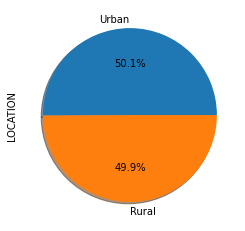

In [194]:
#Kenyans with Bank Accounts by location
kenya_with_account['LOCATION'].value_counts().plot(kind='pie',  shadow=True, autopct='%1.1f%%')

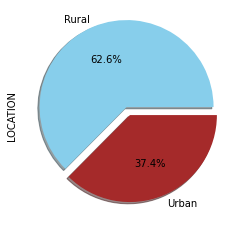

In [195]:
#Kenyans without Bank Accounts by Location

colors= ['skyblue', 'brown', 'gold']
kenya_no_account['LOCATION'].value_counts().plot(kind='pie', colors=colors, explode=explode, shadow=True, autopct='%1.1f%%')

Text(0.5, 1.0, 'Kenyans with Cellphones Vs Without Cellphones')

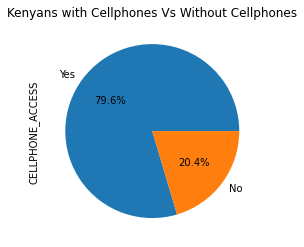

In [196]:
#KEnyans with Cellphone
kenya_only['CELLPHONE_ACCESS'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Kenyans with Cellphones Vs Without Cellphones')

Text(0.5, 1.0, '% of Kenyans with both Phone and Account by Location')

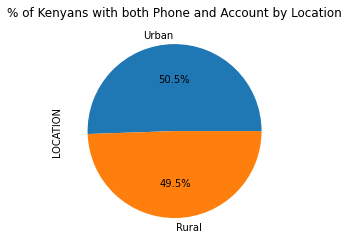

In [197]:
#% Of Kenyans with cellphones and Bank Accounts by location
cellphone_and_account = kenya_with_account[kenya_with_account['CELLPHONE_ACCESS']=='Yes']
cellphone_and_account['LOCATION'].value_counts().plot(kind='pie', autopct='%1.1f%%') 
plt.title('% of Kenyans with both Phone and Account by Location')


Text(0.5, 1.0, 'Cellphone holders Per Country')

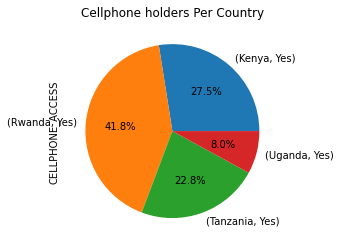

In [198]:
# % of cellphone holders per country
with_phone= finance_inclusion[finance_inclusion['CELLPHONE_ACCESS']=='Yes']
with_phone.groupby('COUNTRY')['CELLPHONE_ACCESS'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cellphone holders Per Country')

Text(0.5, 1.0, 'Percentage of Bank Accounts across the 4 countries')

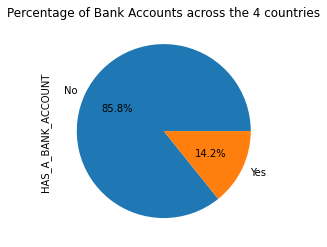

In [199]:
finance_inclusion['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Bank Accounts across the 4 countries')

In [200]:
#explode= (0.1,0,0,0)
#all_with_account.groupby('COUNTRY')['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie',shadow=True, explode=explode, autopct='%1.1f%%')
#plt.title('Distribution of Bank Accounts per Country')

# Numerical Variables

In [201]:
#Filtering for all countries where individuals have a bank acoount 
all_with_account=finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='Yes']

#Median Age with bank account
all_with_account['AGE'].median()


36.0

In [202]:
#Most common age
all_with_account['AGE'].mode()

0    30.0
dtype: float64

In [203]:
#More Analysis using describe

all_with_account.describe()

,YEAR,HOUSEHOLD_SIZE,AGE
count,3235.000000,3235.000000,3235.000000
mean,2017.209274,3.458733,39.342195
std,0.878402,2.034887,13.943035
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,29.000000
50%,2018.000000,3.000000,36.000000
75%,2018.000000,5.000000,47.500000
max,2018.000000,9.000000,83.000000


In [204]:
#Filtering for no bank accounts
all_no_account=finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='No']


In [205]:
#Most Common Age with no Bank Account
all_no_account['AGE'].mode()

0    30.0
dtype: float64

In [206]:
#Median
all_no_account['AGE'].median()

35.0

In [207]:
#More Analysis using Describe()
all_no_account.describe()

,YEAR,HOUSEHOLD_SIZE,AGE
count,19490.000000,19490.000000,19490.000000
mean,2016.928168,3.599949,38.182966
std,0.834238,2.087395,16.088908
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,25.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,9.000000,83.000000


# **2. Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


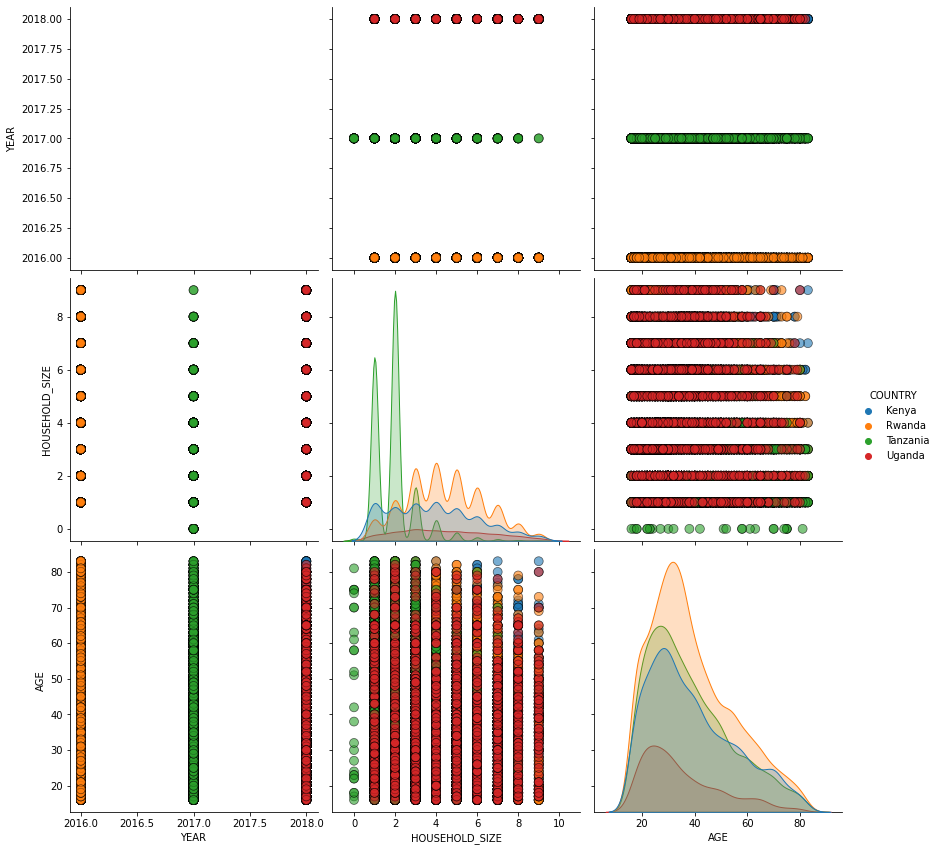

In [208]:
#Crossplots

sns.pairplot(finance_inclusion, hue='COUNTRY', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size= 4 )
#Title
#plt.suptitle('Pair Plot of Financial Inclusion Data 2016-2018', size=20)

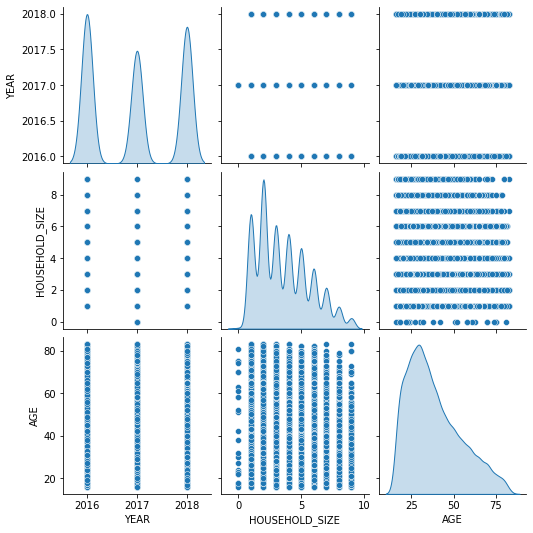

In [209]:
sns.pairplot(finance_inclusion, diag_kind='kde')


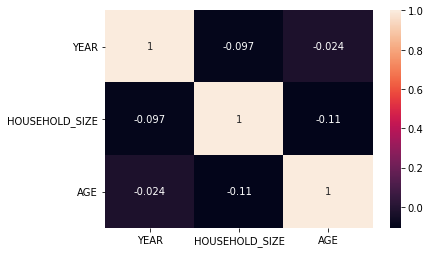

In [210]:
#General Overview of our dataset using heatmaps
#Heatmap below shows how the various variables correlate
sns.heatmap(finance_inclusion.corr(),annot=True)
plt.show()

In [211]:
finance_inclusion.corr()

,YEAR,HOUSEHOLD_SIZE,AGE
YEAR,1.000000,-0.096684,-0.023538
HOUSEHOLD_SIZE,-0.096684,1.000000,-0.106209
AGE,-0.023538,-0.106209,1.000000


Text(0.5, 1.0, 'Household Size Vs Age Scatterplot')

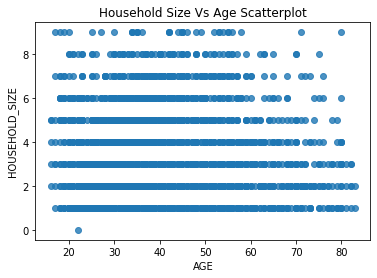

In [212]:
sns.regplot(x=kenya_with_account['AGE'], y = kenya_with_account['HOUSEHOLD_SIZE'], fit_reg=False)
plt.title('Household Size Vs Age Scatterplot')

#There is no relationship between age and household size for Kenyans with bank accounts 

In [213]:
#Calculating the Pearson Coefficient
pearson_coeff = kenya_with_account['AGE'].corr(kenya_with_account['HOUSEHOLD_SIZE'], method='pearson')
print(pearson_coeff)

#THe results below i.e our Pearson Coefficient bear us out. There is no relationship between age and household size

0.025155474043803368


In [214]:
#Calculating the Pearson coefficient for all the countries 
p_c= finance_inclusion['AGE'].corr(finance_inclusion['HOUSEHOLD_SIZE'], method='pearson')
print(p_c)
#For all countries in the datset, there is a weak linear correlation between Age and Household_Size

-0.1062088216975987


# Categorical Data

In [215]:
#kenya_with_account[['HAS_A_BANK_ACCOUNT', 'AGE', 'YEAR']].plot(kind='bar', figsize=(8,6), stacked=True)

**Hypothesis:**
There is a statistically significant difference in Gender(male and Female) between people with and without Bank Accounts

In [216]:
# We run a Chi-Square Test to check whether we can accept the above hypothesis


#Importing the relevant library for hypothesis testing
from scipy.stats import chi2_contingency

In [217]:
#Convert the data into a contingency table with frequencies
cont_freq= pd.crosstab(finance_inclusion['GENDER'], finance_inclusion['HAS_A_BANK_ACCOUNT'])
cont_freq

HAS_A_BANK_ACCOUNT,No,Yes
GENDER,,
Female,11944,1453
Male,7546,1782


In [218]:
#Deriving Percentages by Gender rows
cont_freq_pct = pd.crosstab(finance_inclusion['GENDER'], finance_inclusion['HAS_A_BANK_ACCOUNT'], normalize='index')
cont_freq_pct

HAS_A_BANK_ACCOUNT,No,Yes
GENDER,,
Female,0.891543,0.108457
Male,0.808962,0.191038


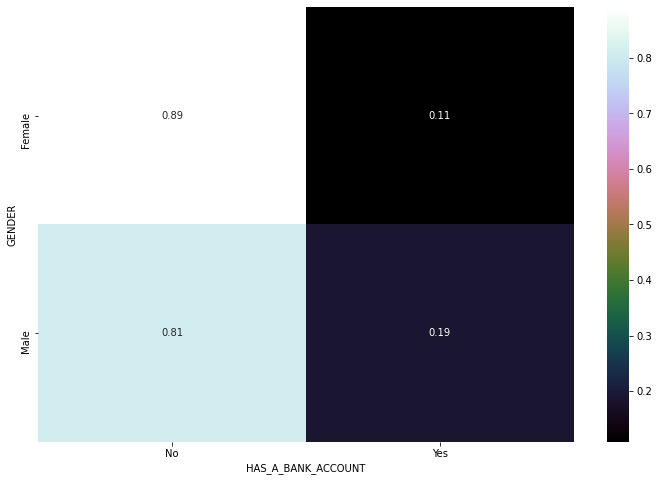

In [219]:
#We visualize the contingency tables using Heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(cont_freq_pct, annot = True, cmap="cubehelix")

#Passing the contingency table to Chi2_contingency function will yield:
#Chi2: The Test Statistic
#p: The p-value of the test
#dof: Degrees of freedom
#expected: The expected frequencies, based on the marginal sums of the table

In [220]:
#Chi-square test of independence
c,p, dof, expected=chi2_contingency(cont_freq_pct)
print(p)


0.06906069531474153


#The p-value is 6.8%. We therefore do not reject the null hypothesis at 95% Confidence that there is a statistically significant difference between people with banks and without banks along gender lines. 

In [221]:
#Hypothesis testing for Bank Account Vs Level of education 

**Hypothesis:** There is a statistically significant difference in bank account ownership and education level

In [222]:
#Converting our data into Frequency Tables
cont_ed= pd.crosstab(finance_inclusion['EDUCATION_LEVEL'], finance_inclusion['HAS_A_BANK_ACCOUNT'])
cont_ed

HAS_A_BANK_ACCOUNT,No,Yes
EDUCATION_LEVEL,,
6,20,5
No formal education,4071,161
Other/Dont know/RTA,0,6
Primary education,11382,1061
Secondary education,3132,968
Tertiary education,550,584
Vocational/Specialised training,335,450


In [223]:
#Derving Percentages of from our frequency tables
cont_ed_pct = pd.crosstab(finance_inclusion['EDUCATION_LEVEL'], finance_inclusion['HAS_A_BANK_ACCOUNT'], normalize='index')
cont_ed_pct

HAS_A_BANK_ACCOUNT,No,Yes
EDUCATION_LEVEL,,
6,0.800000,0.200000
No formal education,0.961957,0.038043
Other/Dont know/RTA,0.000000,1.000000
Primary education,0.914731,0.085269
Secondary education,0.763902,0.236098
Tertiary education,0.485009,0.514991
Vocational/Specialised training,0.426752,0.573248


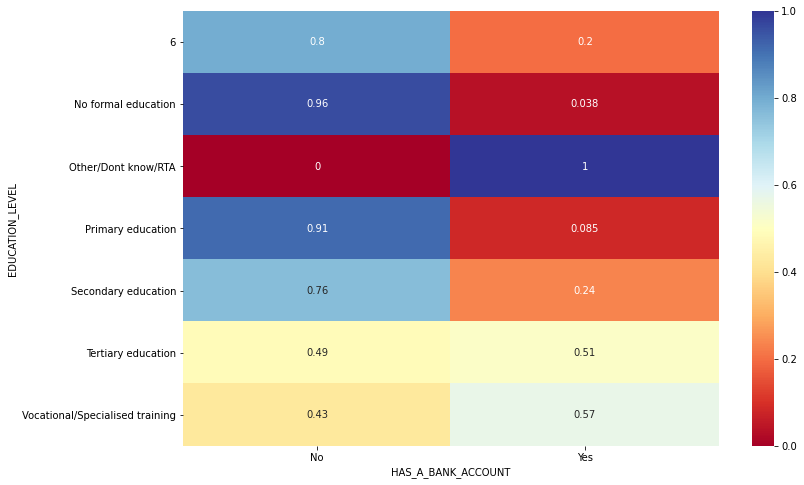

In [224]:
#We visualize the contingency tables using Heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(cont_ed_pct, annot = True, cmap="RdYlBu")

In [127]:
c,p, dof, expected=chi2_contingency(cont_ed_pct)
print(p)


0.8134573678987598


#The p-value is 92%. We do not reject the null hypothesis at 95% confidence level. THe level of education is a key factor in determining whether one has a bank account or not. 

# Job_Type Vs Bank Account

In [225]:
#Alternative hypotheis for Jobs
#There is no statistically significant relationship between one's Job type and whether they have a bank account or not

In [226]:
cont_job= pd.crosstab(finance_inclusion['JOB_TYPE'], finance_inclusion['HAS_A_BANK_ACCOUNT'])
cont_job

HAS_A_BANK_ACCOUNT,No,Yes
JOB_TYPE,,
Dont Know/Refuse to answer,104,14
Farming and Fishing,4676,620
Formally employed Government,85,297
Formally employed Private,471,564
Government Dependent,168,41
Informally employed,5052,438
No Income,572,13
Other Income,843,183
Remittance Dependent,2145,230


In [227]:
cont_job_pct = pd.crosstab(finance_inclusion['JOB_TYPE'], finance_inclusion['HAS_A_BANK_ACCOUNT'], normalize='index')
cont_job_pct

HAS_A_BANK_ACCOUNT,No,Yes
JOB_TYPE,,
Dont Know/Refuse to answer,0.881356,0.118644
Farming and Fishing,0.882931,0.117069
Formally employed Government,0.222513,0.777487
Formally employed Private,0.455072,0.544928
Government Dependent,0.803828,0.196172
Informally employed,0.920219,0.079781
No Income,0.977778,0.022222
Other Income,0.821637,0.178363
Remittance Dependent,0.903158,0.096842


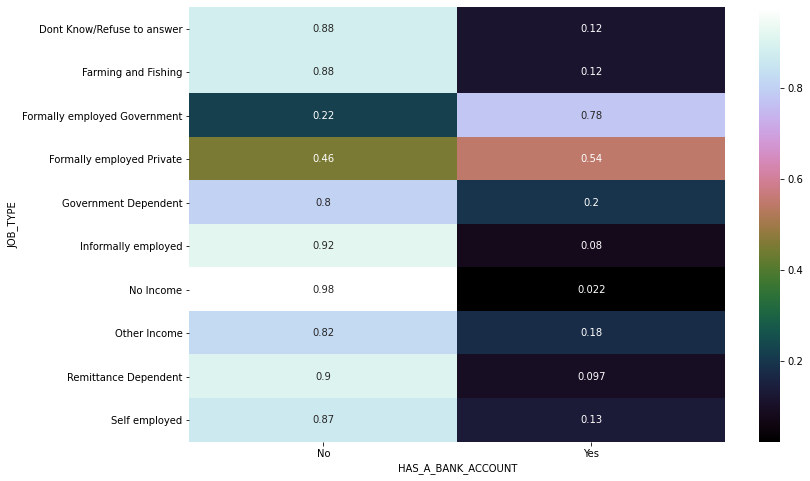

In [228]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_job_pct, annot = True, cmap="cubehelix")

In [229]:
c,p, dof, expected=chi2_contingency(cont_job_pct)
print(p)
print(c)
#With a p-value of 96.6% at 95% level of confidence we reject the alternative hypotheis

0.9655027471083922
2.9692208101524824


# **3.0 Multivariate Analysis**

# **Linear Discriminant Analysis**

In [230]:
finance_inclusion.head()

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [241]:
# Step 1: Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
X= finance_inclusion[['AGE', 'YEAR','HOUSEHOLD_SIZE']]
y= finance_inclusion['HAS_A_BANK_ACCOUNT']

In [242]:
# Step 2: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [243]:
# Step 3: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [244]:
# Step 4: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [245]:
# Step 5: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [246]:
# Step 6: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[3896    0]
 [ 649    0]]
Accuracy0.8572057205720572


With one linear discriminant, the algorithm achieved an accuracy of 86%. This means that with an accuracy of 86% we can predict whether an individual is likely to have a bank account based on age, gender and location etc. 

# **Principal Component Analysis**

We use the Principal Component Analysis to answer our question becuase it is the best technique used to emphasize variation and brings out strong patterns in a dataset. It will be best suited for our dataset which has more than 6 dimensions. 

In [232]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.

X= finance_inclusion[['AGE', 'YEAR','HOUSEHOLD_SIZE']]
y= finance_inclusion['HAS_A_BANK_ACCOUNT']

In [233]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [234]:
#Step 3:
#Data Scaling
#We first begin by standardizing our data to make sure there is no bias accorded on the basis of size
#TO do this, we use the StandardSclaer from Scikit-Learn 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [235]:
#Step 4: PCA Application 
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [236]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

In [237]:
# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 37.47% variance. 
# Similarly, the second principal component causes 33.75% variance in the dataset. 
# Collectively we can say that (37.47 + 33.75) 71.22% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.37830831, 0.340129  , 0.2815627 ])

In [238]:
# Step 6: Using 1 Principal Component
# We will use 1 principal component to train our algorithm. To do so, we execute the following code:
# 
from sklearn.decomposition import PCA

#pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [239]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [240]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.multioutput import MultiOutputClassifier

cm=confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


Our model at 86% accuracy points to the influence age, gender and location have on whether one jas a bank account or not in East Africa

# **4.0 Follow Up Questions**

# a). Did we have the right data?

Yes, though the size of the data across the 4 countries was not the same. Uganda had less data comparatively. 

# b). Do we need other data to answer our question?

Yes, would have been helpful to have data showing the annual percentage growth in bank account ownership. Or ownership across different years. 

**c). Did we ask the right Question**

Yes, from the study we have indeed established that there is a relationship between age, gender and location and ownership of a bank account. 